In [4]:
# system imports
import os
import sys

# data science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns

# signal processing
import scipy
from scipy import signal
from scipy.ndimage import label
from scipy.stats import zscore
from scipy.interpolate import interp1d
from scipy.integrate import trapz


# misc
import warnings

import glob

##
import pytz
import datetime as dt
import math
import seaborn as sns

import pickle


#import seaborn

In [2]:
#style settings
sns.set(style='whitegrid', rc={'axes.facecolor': 'white'})

#sns.set_style({'font.family':'Arial', 'font.serif':'Times New Roman'})

In [4]:
def timedomain(rr):
    results = {}

    hr = 60000/rr
    
    results['Mean RR (ms)'] = np.mean(rr)
    results['STD RR/SDNN (ms)'] = np.std(rr)
    results['Mean HR (Kubios\' style) (beats/min)'] = 60000/np.mean(rr)
    results['Mean HR (beats/min)'] = np.mean(hr)
    results['STD HR (beats/min)'] = np.std(hr)
    results['Min HR (beats/min)'] = np.min(hr)
    results['Max HR (beats/min)'] = np.max(hr)
    results['RMSSD (ms)'] = np.sqrt(np.mean(np.square(np.diff(rr))))
    results['NNxx'] = np.sum(np.abs(np.diff(rr)) > 50)*1
    results['pNNxx (%)'] = 100 * np.sum((np.abs(np.diff(rr)) > 50)*1) / len(rr)
    return results

In [26]:
def get_task_type(selected_path):
    
    with open(selected_path, 'rb') as f:
        ecg_data = pickle.load(f)
        
    task_type = ecg_data["task_type"]
    
    return task_type
    

In [50]:
ecg_extracted_info_dir = "/home/muhammad/Desktop/Datasets/dataset_sony_sam/Data_analysis_ECG/pkld_file_per_subject_per_task"
ecg_extracted_info_files_list = glob.glob(ecg_extracted_info_dir+ "/*.pkl")

In [58]:
    
pre_assement_files_list = []
positive_feedback_files_list = []
negative_feedback_files_list = []
for sel_ecg_extr_info_file_path in ecg_extracted_info_files_list:

    
    task_type_ii= get_task_type(sel_ecg_extr_info_file_path)
    
    if task_type_ii=="pre_assesment":
        pre_assement_files_list.append(sel_ecg_extr_info_file_path)
    
    elif task_type_ii =="negative":
        negative_feedback_files_list.append(sel_ecg_extr_info_file_path)
    
    elif task_type_ii =="positive":
        positive_feedback_files_list.append(sel_ecg_extr_info_file_path)
        
    
    #print(task_type_ii)

In [59]:
print("Total Preassesment files:" + str(len(pre_assement_files_list)))
print("Total Positive feedback files:" + str(len(positive_feedback_files_list)))
print("Total Negative feedback files:" + str(len(negative_feedback_files_list)))


Total Preassesment files:20
Total Positive feedback files:20
Total Negative feedback files:20


In [115]:
def plot_info_per_condition(condition_files_path):
    mean_bpm = "mean_hbpm"
    std_bpm = "std_hbpmy"
    task_type = "task_type"
    
    mean_bpm_list = []
    std_bpm_list = []
    task_type_list = []
    file_name_list = []
    
    
    for sel_file in condition_files_path:
        main_dir, file_name_ii = os.path.split(sel_file)
        with open(sel_file, 'rb') as f:
            ecg_data = pickle.load(f)
        
        mean_bpm_ind= ecg_data[mean_bpm]
        std_bpm_ind = ecg_data[std_bpm]
        #task_type_ind = task_type_list[task_type]
        
        mean_bpm_list.append(mean_bpm_ind)
        std_bpm_list.append(std_bpm_ind)
        file_name_list.append(file_name_ii[25:-4])
        #task_type_list.append(task_type_ind)
        
        
    return mean_bpm_list, std_bpm_list, file_name_list
        
        
def caculate_mean_list_list(mean_list_list):
    mean_list=np.mean(mean_list_list, axis=0)
    return mean_list
def caculate_std_list_list(mean_list_list):
    std_list = np.std(mean_list_list, axis=0)
    return std_list
def caculate_median_list_list(median_list_list):
    median_list=np.median(median_list_list, axis=0)
    return median_list


        
    

In [101]:
mean_list_list_pre_ass, std_list_list_pre_ass, file_name_list_pre_asses= plot_info_per_condition(pre_assement_files_list)
mean_list_list_pos, std_list_list_pos, file_name_list_pos= plot_info_per_condition(positive_feedback_files_list)
mean_list_list_neg, std_list_list_neg, file_name_list_neg= plot_info_per_condition(negative_feedback_files_list)

In [ ]:
def base_normalization(list_non_norm):
    
    event_1 = 0
    event_2 =list_non_norm[1] - list_non_norm[0]
    event_3 =list_non_norm[2] -list_non_norm[0]
    norm_baeline = [event_1, event_2, event_3]
    
    return norm_baeline

In [197]:
dest_complete_folder ="/home/muhammad/Desktop/Datasets/dataset_sony_sam/Data_analysis_ECG/baseline_subtracted_hbpm_figures"
    


In [ ]:

    

    
    
for ind_sub, mean_subj_preass in  enumerate(mean_list_list_pre_ass):
    #style settings
    sns.set(style='whitegrid', rc={'axes.facecolor': 'white'})

    #sns.set_style({'font.family':'Arial', 'font.serif':'Times New Roman'})
    plt.rcParams['font.size'] = 11

    x_labels = ["Baseline", "Task", "Recovery"]
    x_pos = np.arange(len(x_labels))

    fig, ax = plt.subplots()
    sel_sub_id = file_name_list_pre_asses[ind_sub][:-14]
        
    sel_sub_id_pos = sel_sub_id +"_positive"
    ind_pos_file =file_name_list_pos.index(sel_sub_id_pos)
    mean_subj_pos=mean_list_list_pos[ind_pos_file]
    
    sel_sub_id_neg =sel_sub_id +"_negative"
    ind_neg_file =file_name_list_neg.index(sel_sub_id_neg)
    mean_subj_neg=mean_list_list_pos[ind_neg_file]
    
    
    print("Preassesment subject id:" +  file_name_list_pre_asses[ind_sub])
    print("Positive feedback subject id:" + file_name_list_pos[ind_pos_file])
    print("Negative feedback subject id:" + file_name_list_neg[ind_neg_file])
    #sel_sub_id = mean_subj
    #print(sel_sub_id)
    #print(ind_pos_file)
    
    


    pre_asses_lab = "Pre-assement"
    positive_lab = "Positive feedback"
    negative_lab = "Negative feedback"
    baseline_sub_mean_preass = base_normalization(mean_subj_preass)
    baseline_sub_mean_pos = base_normalization(mean_subj_pos)
    baeline_sub_mean_neg = base_normalization(mean_subj_neg)
    print(baseline_sub_mean_preass)
    print(baseline_sub_mean_pos)
    print(baeline_sub_mean_neg)
    



    ax.errorbar(x_pos,  list(baseline_sub_mean_preass),  yerr=0, capsize=5, capthick=2, label=pre_asses_lab)
    ax.errorbar(x_pos,  list(baseline_sub_mean_pos),  yerr=0, capsize=5, capthick=2,label=positive_lab)
    ax.errorbar(x_pos,  list(baeline_sub_mean_neg),  yerr=0, capsize=5, capthick=2, label=negative_lab)

    ax.set_ylabel("Baseline subtracted mean HBPM")
    ax.set_xticks(x_pos)
    ax.set_xticklabels(x_labels, rotation=45, ha='right', rotation_mode='anchor')
    ax.title.set_text(file_name_list_pre_asses[ind_sub])

    for pos in ['right', 'top', 'bottom', 'left']:
        plt.gca().spines[pos].set_visible(False)


    ax.yaxis.grid(True)
    plt.legend(loc='upper right')
        #plt.ylim(-2, 7) 
    plt.tight_layout()
    plt.show()
    fig_name=sel_sub_id+".png"
    fig_comp_path = os.path.join(dest_complete_folder, fig_name)
    fig.savefig(fig_comp_path)
        
        
        

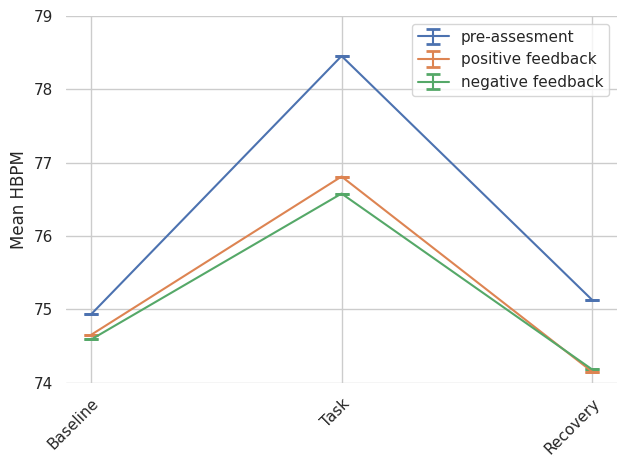

In [201]:

#style settings
sns.set(style='whitegrid', rc={'axes.facecolor': 'white'})

#sns.set_style({'font.family':'Arial', 'font.serif':'Times New Roman'})
mpl.rcParams['font.size'] = 11

x_labels = ["Baseline", "Task", "Recovery"]
x_pos = np.arange(len(x_labels))

fig, ax = plt.subplots()
 
mean_pre_asses = caculate_mean_list_list(mean_list_list_pre_ass)
std_pre_asses = caculate_std_list_list(mean_list_list_pre_ass)

mean_pos = caculate_mean_list_list(mean_list_list_pos)
std_pos = caculate_std_list_list(mean_list_list_pos)

mean_neg = caculate_mean_list_list(mean_list_list_neg)
std_neg = caculate_std_list_list(mean_list_list_neg)

pre_asses_lab = "pre-assesment"
pos_lab ="positive feedback"
neg_lab ="negative feedback"



ax.errorbar(x_pos,  list(mean_pre_asses),  yerr=0, capsize=5, capthick=2, label=pre_asses_lab)
ax.errorbar(x_pos,  list(mean_pos),  yerr=0, capsize=5, capthick=2,label=pos_lab)
ax.errorbar(x_pos,  list(mean_neg),  yerr=0, capsize=5, capthick=2, label=neg_lab)

#ax.errorbar(x_pos,  list(mean_pre_asses),  yerr=std_pre_asses, capsize=5, capthick=2, label=pre_asses_lab)
#ax.errorbar(x_pos,  list(mean_pos),  yerr=std_pos, capsize=5, capthick=2,label=pos_lab)
#ax.errorbar(x_pos,  list(mean_neg),  yerr=std_neg, capsize=5, capthick=2, label=neg_lab)

ax.set_ylabel("Mean HBPM")
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels, rotation=45, ha='right', rotation_mode='anchor')

for pos in ['right', 'top', 'bottom', 'left']:
   plt.gca().spines[pos].set_visible(False)


ax.yaxis.grid(True)
plt.legend(loc='upper right')
plt.ylim(74, 79) 
plt.tight_layout()
plt.show()

In [91]:
def get_cumsum_cond(input_array):
    
    mean_diff = np.diff(input_array)
    
    mean_diff = np.insert(mean_diff, [0], 0)
    
    mean_diff_cumsum = np.cumsum(mean_diff, dtype=float)
    
    return (mean_diff_cumsum)

In [94]:
rate_change_pre_asses= get_cumsum_cond(mean_pre_asses)
rate_change_pos = get_cumsum_cond(mean_pos)
rate_change_neg = get_cumsum_cond(mean_neg)
#mean_list_list_pos, std_list_list_pos, file_name_list_pos= plot_info_per_condition(positive_feedback_files_list)
#mean_list_list_neg, std_list_list_neg, file_name_list_neg= plot_info_per_condition(negative_feedback_files_list)

In [119]:
def base_normalization(list_non_norm):
    
    event_1 = 0
    event_2 =list_non_norm[1] - list_non_norm[0]
    event_3 =list_non_norm[2] -list_non_norm[0]
    norm_baeline = [event_1, event_2, event_3]
    
    return norm_baeline

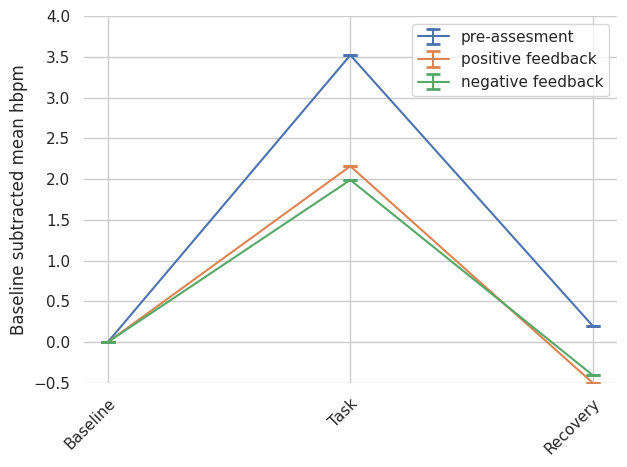

In [203]:
import matplotlib.pyplot as mpl
import seaborn
#style settings
sns.set(style='whitegrid', rc={'axes.facecolor': 'white'})

#sns.set_style({'font.family':'Arial', 'font.serif':'Times New Roman'})
mpl.rcParams['font.size'] = 11

x_labels = ["Baseline", "Task", "Recovery"]
x_pos = np.arange(len(x_labels))

fig, ax = plt.subplots()
 
mean_pre_asses = caculate_mean_list_list(mean_list_list_pre_ass)
mean_pos = caculate_mean_list_list(mean_list_list_pos)
mean_neg = caculate_mean_list_list(mean_list_list_neg)

pre_asses_lab = "pre-assesment"
pos_lab ="positive feedback"
neg_lab ="negative feedback"



ax.errorbar(x_pos,  list(rate_change_pre_asses),  yerr=0, capsize=5, capthick=2, label=pre_asses_lab)
ax.errorbar(x_pos,  list(rate_change_pos),  yerr=0, capsize=5, capthick=2,label=pos_lab)
ax.errorbar(x_pos,  list(rate_change_neg),  yerr=0, capsize=5, capthick=2, label=neg_lab)

ax.set_ylabel("Baseline subtracted mean hbpm")
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels, rotation=45, ha='right', rotation_mode='anchor')

for pos in ['right', 'top', 'bottom', 'left']:
   plt.gca().spines[pos].set_visible(False)


ax.yaxis.grid(True)
plt.legend(loc='upper right')
plt.ylim(-0.5, 4) 
plt.tight_layout()
plt.show()

In [121]:
basline_norm_pre_asses= base_normalization(mean_pre_asses)
baseline_norm_pos = base_normalization(mean_pos)
baseline_norm_neg = base_normalization(mean_neg)

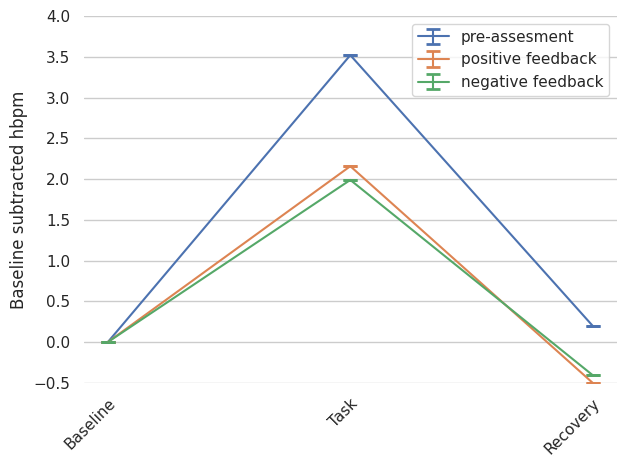

In [134]:
import matplotlib.pyplot as mpl
import seaborn
#style settings
sns.set(style='whitegrid', rc={'axes.facecolor': 'white'})

#sns.set_style({'font.family':'Arial', 'font.serif':'Times New Roman'})
mpl.rcParams['font.size'] = 11

x_labels = ["Baseline", "Task", "Recovery"]
x_pos = np.arange(len(x_labels))

fig, ax = plt.subplots()

pre_asses_lab = "pre-assesment"
pos_lab ="positive feedback"
neg_lab ="negative feedback"



ax.errorbar(x_pos,  list(basline_norm_pre_asses),  yerr=0, capsize=5, capthick=2, label=pre_asses_lab)
ax.errorbar(x_pos,  list(baseline_norm_pos),  yerr=0, capsize=5, capthick=2,label=pos_lab)
ax.errorbar(x_pos,  list(baseline_norm_neg),  yerr=0, capsize=5, capthick=2, label=neg_lab)

ax.set_ylabel("Baseline subtracted hbpm")
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels, rotation=45, ha='right', rotation_mode='anchor')

for pos in ['right', 'top', 'bottom', 'left']:
   plt.gca().spines[pos].set_visible(False)


ax.xaxis.grid(False)
plt.legend(loc='upper right')
plt.ylim(-0.5, 4) 
plt.tight_layout()
plt.show()